In [57]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from scipy import stats
import os

In [2]:
# Leemos el archivo
myFolder=(os.getcwd()+'/tc01_data/') #busca en el directorio actual

# Primero creamos la red de delfines. Agregando los enlaces se agregan automaticamente los nodos
colab = nx.read_gml(myFolder+'netscience.gml')
#net = nx.read_gml(myFolder+'as-22july06.gml')


In [3]:
C_adj = nx.to_numpy_matrix(colab)
#N_adj = nx.to_numpy_matrix(net)

nodosC = colab.number_of_nodes()
#nodosN = net.number_of_nodes()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

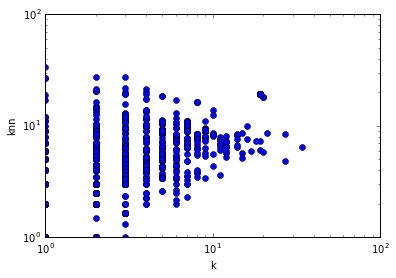

In [12]:
# k es el vector de grado de cada nodo
k_C = [val for (node, val) in colab.degree()]
k_annd_C = np.zeros(nodosC)

for i in range(nodosC):
    if k_C[i]==0:
        k_annd_C[i]=0
    else:
        k_annd_C[i] = np.dot(np.array(C_adj[i,:]), k_C) / k_C[i]
#k_C[i] numero de vecinos propios para promediar.

#ii
plt.plot(k_C,k_annd_C,'bo')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('knn')
plt.xlabel('k')
plt.show()

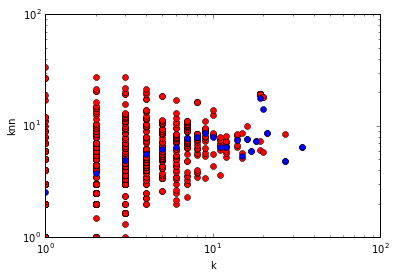

In [82]:
#Tenemos que promediar:
#Ordenar el k_annd_C en funcion del key del k_C
knn=[x for _,x in sorted(zip(k_C,k_annd_C))]
#Ordenamos el k
k=np.sort(k_C)

# habria que eliminar los ceros para que no haya problemas al hacer log o que deje los ceros

v=np.where(k==0)
listak=list(k)
del listak[0:127]

# el vector k_un es el k ordenado sin elementos repetidos
k_un=np.unique(k)
knn_un=np.zeros(len(k_un))
knn_error=np.zeros(len(k_un))

for i,j in enumerate(k_un):
    v=np.where(k==j)
    if len(v[0])>1:
        knn_un[i]=np.mean(knn[v[0][0]:v[0][-1]]) # promediamos para cada grado
        knn_error[i]=np.std(knn[v[0][0]:v[0][-1]])
    else:
        knn_un[i]=knn[v[0][0]]    # para el caso de un unico elemento
        knn_error[i]=0
        
plt.plot(k,knn,'ro')    
plt.plot(k_un,knn_un,'bo')
#buscar como poner barras de error al grafico
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('knn')
plt.show()
    


In [62]:
#Ajuste:
print(np.log(k[1:-1]))
#slope, intercept, r_value, p_value, std_err=stats.linregress(np.log(k),np.log(knn))

#print (slope)
#print (intercept)

[      -inf       -inf       -inf ... 3.29583687 3.29583687 3.52636052]


/home/danilo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


# Nombre del nodo - Grado - Promedio de k(vecino)